# Demo 3: Reactive Transport

This notebook contains a series of problems that demonstrate how to set up and run reactive transport simulations with Amanzi-ATS. It is organized in 3 subproblems that demonstrate the following processes of increasing complexity: 

1. Transport of a solute dissolved in surface water.
2. Reactive transport of 2 solutes in the subsurface. 
3. Integrated flow and reactive transport. 

The surface transport problem uses a dilution test as an example for setting solute sources and demonstrating key physical transport processes. The subsurface transport problem demonstrates how to set boundary conditions for transport and adds sorption to introduce reactions. The simulation of integrated flow and reactive transport in a hillslope . 

This notebook describes the problems, visualizes the results and guides the attendees to tinker with various parameters and analyze model response. The attendees should have following three directories with respective model files in them. <br>

1) surface_transport <br>
2) subsurface_transport <br>
3) hillslope <br> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
from IPython.display import Image

## 1) Surface Transport

### 1.1) Problem Description 

The surface transport is demonstrated using a simple 1D tranport in a 100 m long stream section with 3 m^2 cross section area. Dilution test, a common technique to measure discharge ($Q$) in the field is used as an example. In this test, solute solution of known solute concentration ($C_{in}$) is injected into the stream at a known steady rate ($Q_{in}$) and concentration time series ($C_{obs}$) also known as breakthrough curve (BTC) is measured at a downstream location. Figure below shows the schematics of the problem. <br>

<img src="./pictures/surface_problem.jpg" alt="Drawing" style="width: 1000px;"/>

The expected plateau concentration is calculated based on the mass conservation of the solute (see figure). The arrival time of the solute front at the measurement location is $\frac{100m}{\frac{0.03m^3/s}{3m^2}} = 10,000 s$

The key features of this demo:

1) 2D mesh for surface transport <br>
2) Solute injection using PFLOTRAN <br>
3) Advection-dispersion <br>
4) Decay (special case)

### 1.2) Input Specs 

Here some of the transport specific input specifications and respective parameter lists are described. The directory should have following files in the <I>surface_transport</I> directory:

* surface_transport.xml (ATS input file)
* surface_transport.in  (PFLOTRAN input file)
* hanford.dat (Database)
  
Solute injection related inputs:

* <b>Injection rate</b>: This is provided in the form of flow rate per unit volume (area in case of surface domain) of injection domain, in the parameterlist <b><i>surface-water_source</i></b> <br>
* <b> Solute concentration in the injection </b>: This is provided in the PFLOTRAN input file as molarity in the <b><i>CONSTRAINT</i></b> deck <br>

Transport processes related inputs:

* <b>Advection</b>: Flowrate in the domain (Q): This is provided in the form of flux (flowrate per unit cross-section area) in the parameterlist <b><i>surface-mass_flux</i></b> <br>
* <b>Dispersion</b>: Dispersion coefficient: This is provided in the parameterlist <b><i>material properties</i></b>

<img src="./pictures/surface_problem_ATS.jpg" alt="Drawing" style="width: 800px;"/>

### 1.3) Result Visualization

Here, we are visualizing results in the form of concentration timeseries or breakthrough curve (BTC) at a given location. This is done through <b><i>observations</i></b> parameterlist. The BTC is written in ATS in a ".dat" file. 

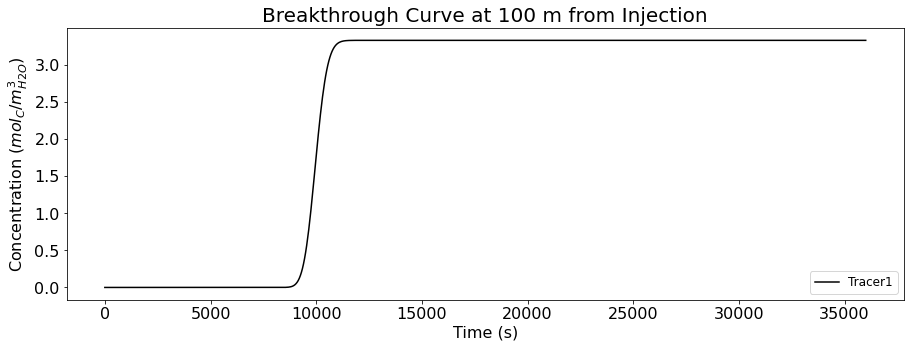

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
path='./surface_problem/'
BTC_1 = np.loadtxt(path+'surface-outlet.dat', skiprows=11) # surface-outlet.dat is the BTC file
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(BTC_1[:,0], BTC_1[:,1], 'k-', label='Tracer1')
plt.title("Breakthrough Curve at 100 m from Injection", fontsize=20)
plt.xlabel("Time (s)",fontsize=16)
plt.ylabel("Concentration ($mol_C/m^3_{H2O}$)",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=12, loc='lower right')
plt.show()

### 1.4) Exercise 

Attendees (during the session or at "home") should tinker with the injection and transport parameters and see the effects on the BTC. Some of the suggestions:
1) Double the value of <b><i>surface-mass_flux</i></b> and solute arrival should be at 5000s. However, this also increases the dilution and hence the plateau concetration should also be halved. <br> 
2) Try higher values of dispersion coefficient <br>
3) Change concentration of injected solute and see the change in the plateau concentration <br>
4) Introduce decay of solute by using non zero reaction coefficient value in the PFLOTRAN input file <br>

## 2) Subsurface Transport

### 2.1) Problem Description

The subsurface transport is demonstrated using a 1D reactive transport in a 100m long domain with 2m witdh and 1.5m depth (3D mesh: 200-1-1) with a specified concentration boundary. The flux ($q$) in the horizontal direction is specific along with dispersivities (using bear model), porosity ($\theta$), permeability ($k$) and sorption parameters ($Kd$). The reactant (Tracer1) in this example entering the domain through the specificied concentration boundary is undergoing first order decay into product (Tracer2). Both the componenets are also undergoing equillibrium sorption in the domain. 

<img src="./pictures/subsurface_problem.jpg" alt="Drawing" style="width: 800px;"/>

The arrival time of the solute front at the measurement location in no sorption case is $\frac{100m}{\frac{0.0025m/s}{0.25}} = 10,000 s$


The key features of this demo:

1) 3D mesh for surface transport <br>
2) Specific concetration boundary <br>
3) Advection-dispersion-sorption <br>
4) First order reaction


### 2.2) Input Specs

Here some of the transport specific input specifications and respective parameter lists are described. The directory should have following files in the <I>surface_transport</I> directory:

* subsurface_transport.xml (ATS input file)
* subsurface_transport.in  (PFLOTRAN input file)
* hanford.dat (Database)
  
Boundary:

* <b>Concentration boundary</b>: This is provided as geochemical condition in the parameterlist <b><i>boundary conditions</i></b> <br>
* <b> Concentration value </b>: This is provided in the PFLOTRAN input file as molarity in the <b><i>CONSTRAINT</i></b> deck <br>

Transport processes related inputs:

* <b>Advection</b>: This is provided in the form of flux (flowrate per unit cross-section area, q) in the parameterlist <b><i>surface-mass_flux</i></b> <br>
* <b>Dispersion</b>: Dispersivity: Bear model is used to provide dispersivity values using parameterlist <b><i>material properties</i></b>

Reaction related inputs:
* <b>Equillibrium Sorption</b>: Equilibrium sorption is enabled in ATS using <b><i>isotherm_kd</i></b> parameterlist
* <b>Equillibrium Sorption Coefficient</b>: Equilibrium sorption coefficient Kd ($kg-water / m^3-bulk$) is provided in PFLOTRAN input file under  <b><i>SORPTION</i></b> deck, causing retardation by a factor as calculated below

<img src="./pictures/sorption.png" alt="Drawing" style="width: 350px;"/>

* <b> Reaction Coefficient </b>: The rate constant of first order conversion from Tracer1 into Tracer2 is provided in the PFLOTRAN input file under <b><i>GENERAL_REACTION</i></b> deck <br>

### 2.3) Result Visualization

Here, we are visualizing results in the form of concentration timeseries or breakthrough curve (BTC) at a given location. This is done through observations parameterlist. The BTC is written in ATS in a ".dat" file. ATS yields outlet.dat file containing aqueous species and outlet_sorbed.dat. file contained sorbed species. Below, only aqeuous concentrations are showed. 

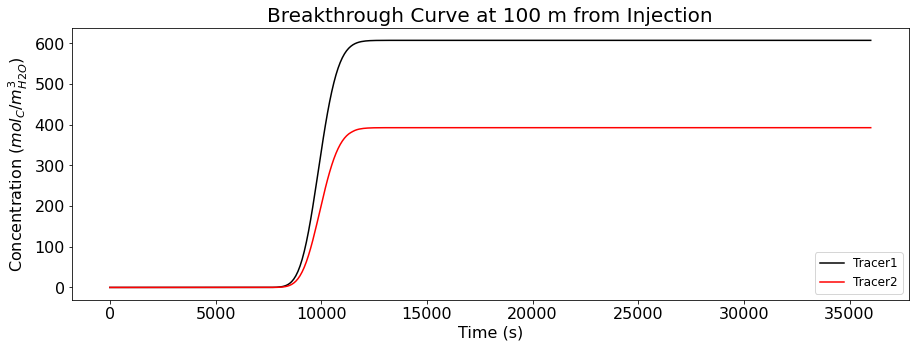

In [3]:
plt.rcParams['figure.figsize'] = [10, 5]
path='./subsurface_problem/'
BTC_1 = np.loadtxt(path+'outlet.dat', skiprows=11) # outlet.dat is the BTC file for Aqueous species
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(BTC_1[:,0], BTC_1[:,1], 'k-', label='Tracer1')
plt.plot(BTC_1[:,0], BTC_1[:,2], 'r-', label='Tracer2')
plt.title("Breakthrough Curve at 100 m from Injection", fontsize=20)
plt.xlabel("Time (s)",fontsize=16)
plt.ylabel("Concentration ($mol_C/m^3_{H2O}$)",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=12, loc='lower right')
plt.show()

### 2.4) Exercise 

Attendees (during the session or at "home") should tinker with transport and reaction parameters and see the effects on the BTCs. Some of the suggestions:

1) Set sorption coefficient Kd values equal to 100 for both the species in PFLOTRAN input file. This should increase the arrival time of solute fronts by the factor of retardation factor (1.4 for this case) <br>
2) Change reaction rate constant in PFLOTRAN input file and see the changes in the plateau concentrations of Tracer1 and Tracer2 <br>
3) For a non-zero sorption case, replace General Reaction deck in PFLOTRAN input file:

<img src="./pictures/general_rxn.png" alt="Drawing" style="width: 250px;"/>

by Readioactive Reaction deck:

<img src="./pictures/radioactive_rxn.png" alt="Drawing" style="width: 250px;"/>


The difference you see is because general reaction takes place only in the aqueous phase while radioactive decay takes place in both aqueous and sorbed phases